In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

## 인공신경망

In [102]:
df_raw = pd.read_csv("/home/piai/강의자료/Datahandling/2. Big Data 분석/유방암.csv", encoding = 'euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [103]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [104]:
df_raw['diagnosis'] = df_raw['diagnosis'].replace({'양성': 1, '음성': 0})

In [105]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [106]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [107]:
nn_uncustomized = MLPClassifier(random_state=1234)
# hidden_layer_sizes = (100,100) 변경 (은닉층 2개, 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.599
Accuracy on test set: 0.758


train : 59%, test : 75%로 정확도가 매우 낮음.

In [108]:
train_accuracy = [];test_accuracy = []

# 은닉충 노드 : 5~100
para_hidden = [5 * hidden for hidden in range(1,21)]

print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.599,0.758
1,10,0.594,0.750
2,15,0.401,0.242
3,20,0.901,0.875
4,25,0.870,0.898
5,30,0.599,0.758
6,35,0.932,0.914
7,40,0.599,0.758
8,45,0.938,0.938
9,50,0.932,0.906


 - Hidden Layer : 은닉층 변경에 따른 모델 성능  
 구조가 복잡할수록 성능이 개선되는 경향을 보인다.

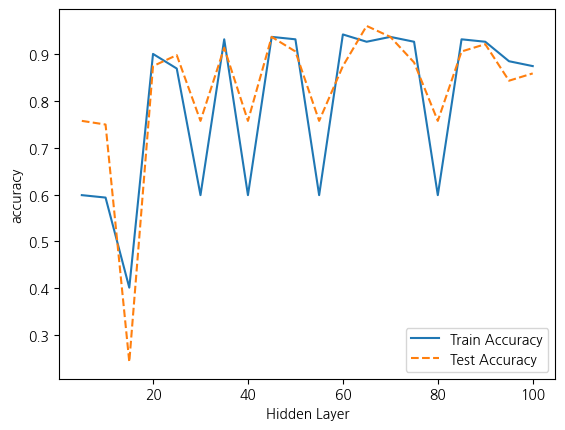

In [109]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy");plt.xlabel("Hidden Layer")
plt.legend()
plt.show()

In [110]:
train_accuracy = [];test_accuracy = []

para_function = ['logistic','tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.943,0.898
1,tanh,0.943,0.906
2,relu,0.599,0.758


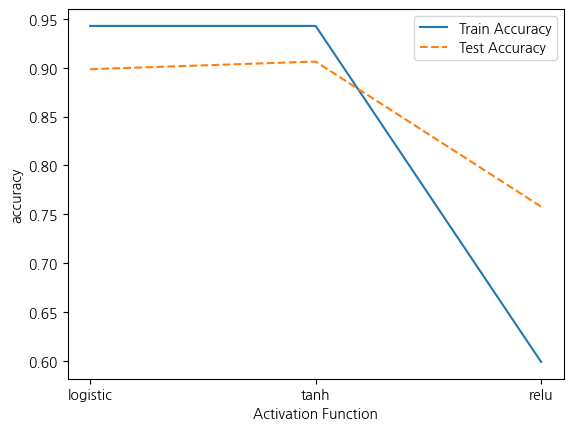

In [111]:
plt.plot(para_function, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy");plt.xlabel("Activation Function")
plt.legend()
plt.show()

In [112]:
v_feature_name = df_train_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [113]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


In [114]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


In [115]:
train_accuracy = []
test_accuracy = []

# 은닉충 노드 : 5~100
para_hidden = [5 * hidden for hidden in range(1,21)]

print(para_hidden)

for v_hidden in para_hidden:
    #nn = nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state=1234) 은닉층 1D
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

df_accuracy_hidden.round(3)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.953,0.891
1,10,0.984,0.938
2,15,0.984,0.922
3,20,0.984,0.945
4,25,0.995,0.961
5,30,1.000,0.953
6,35,0.995,0.945
7,40,1.000,0.938
8,45,1.000,0.953
9,50,1.000,0.945


모델 특성 등을 고려하여 hiddenlayer를 25로 선택.

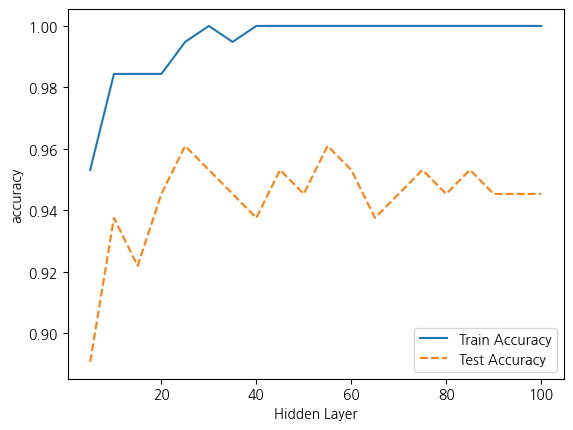

In [116]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Hidden Layer")
plt.legend()
plt.show()

In [117]:
hidden_layer_sizes = 25

 - Activation  
 활성화 함수에 따른 모델 성능

In [118]:
train_accuracy = [];test_accuracy = []

para_function = ['logistic','tanh', 'relu']

for v_function in para_function:
    # nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state=1234) 으로 변경가능
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (25,25), random_state=1234) 
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.990,0.945
1,tanh,0.995,0.945
2,relu,0.995,0.961


scale 적용 후 세 가지 활성화 함수 중 relu 함수를 사용한 모델의 정확도가 가장 높게 측정.  
relu 선택.

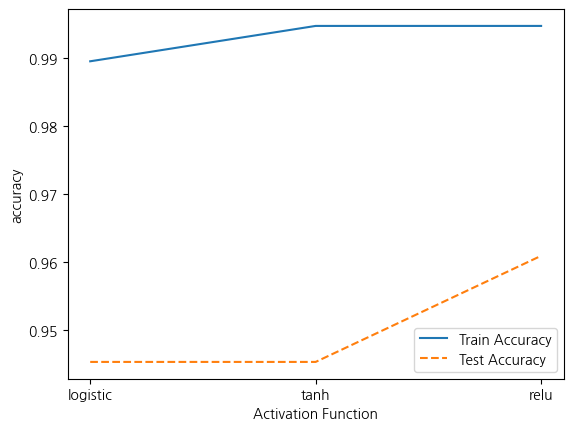

In [119]:
plt.plot(para_function, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Activation Function")
plt.legend()
plt.show()

In [120]:
activation = "relu"

 - Solver  
 가중치 최적화 변경에 따른 모델 성능

In [121]:
train_accuracy = []
test_accuracy = []

# solver 변경
para_solver = ['lbfgs','sgd','adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = 'relu', hidden_layer_sizes = (25,25), random_state=1234) 
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.969
1,sgd,0.953,0.883
2,adam,0.995,0.961


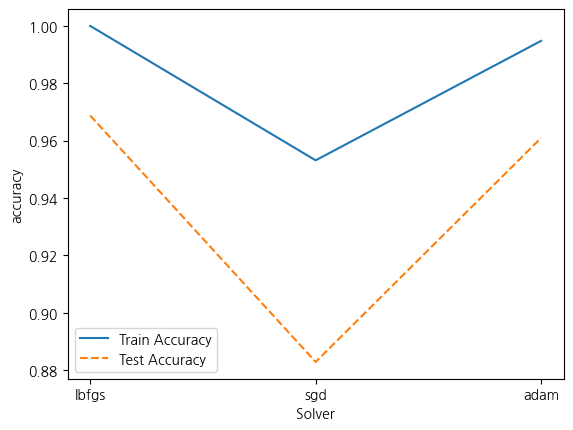

In [122]:
plt.plot(para_solver, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Solver")
plt.legend()
plt.show()

In [123]:
solver = "adam"

lbfgs와 adam의 정확도가 똑같지만, adam은 대량 데이터 적용 시 모델의 성능이 우수한 편이라고 알려져 adam 사용.

In [124]:
train_accuracy = [];test_accuracy = []

para_batch = [20 * batch for batch in range(1,10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'adam', activation = 'relu', hidden_layer_sizes = (25,25), random_state=1234) 
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

df_accuracy_batch.round(3)

[20, 40, 60, 80, 100, 120, 140, 160, 180]


,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.000,0.961
1,40,1.000,0.961
2,60,1.000,0.961
3,80,0.995,0.961
4,100,0.995,0.961
5,120,0.995,0.961
6,140,0.995,0.961
7,160,0.995,0.961
8,180,0.995,0.953


Mini Batch가 180 이상이면 오히려 정확도가 떨어지는 경향을 보인다.
Mini Batch = 40으로 선택.

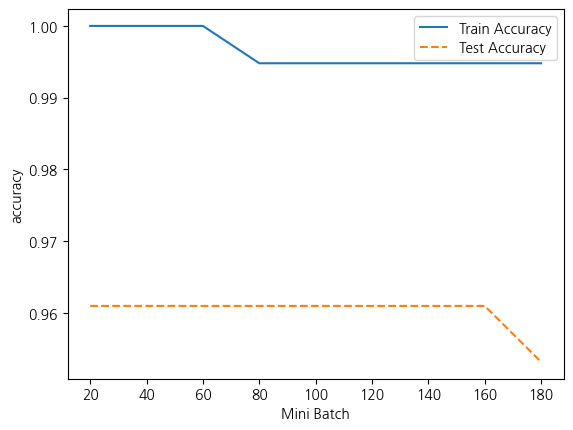

In [125]:
plt.plot(para_batch, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("Mini Batch")
plt.legend()
plt.show()

In [126]:
nn_final = MLPClassifier(hidden_layer_sizes=(25,25), activation='relu', solver='adam',batch_size=40, random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print("Accuracy on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.953
Confusion matrix :
[[92  5]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.948     0.974        97
           1      0.861     1.000     0.925        31

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



테스트 기준 정확도는 95%

## KNN(k-Nearest Neighbors)

In [127]:
df_raw = pd.read_csv("/home/piai/강의자료/Datahandling/2. Big Data 분석/유방암.csv", encoding = 'euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [128]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [129]:
df_raw['diagnosis'] = df_raw['diagnosis'].replace({'양성': 1, '음성': 0})

In [130]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [131]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [132]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set: 0.914


train : 93%, test : 91%

* 이웃 수 증가에 따른 정확도 변화

In [133]:
train_accuracy = [];test_accuracy = []

# 최대 이웃 수 :1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors) 
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.898
1,2,0.938,0.914
2,3,0.932,0.898
3,4,0.911,0.891
4,5,0.932,0.914
5,6,0.927,0.914
6,7,0.927,0.898
7,8,0.922,0.914
8,9,0.911,0.906
9,10,0.911,0.906


이웃수가 13일때 정확도가 제일 높게 출력.  
최종 모델에 Neighbors = 13 반영.

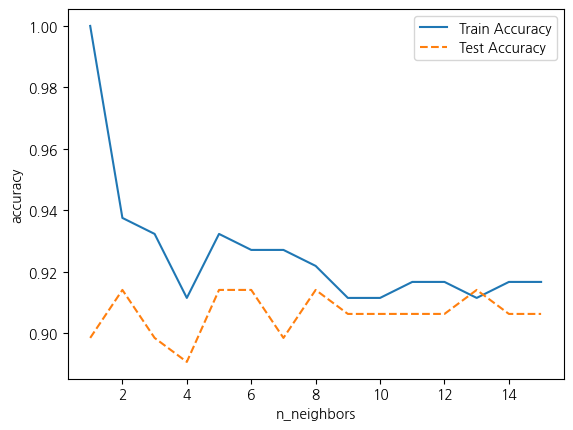

In [134]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [135]:
n_neighbors = 13

* 가중치별 이웃 수 증가에 따른 정확도 변화

In [136]:
train_accuracy = [];test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 2

# 가중치(uniform, distance)
para_weights = (['uniform']) * 10 + (['distance'] * 10)

# zip(list1, list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop : n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop : n_neighbors = para_n_neighbors[1], weights = para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

    
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_n_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.938,0.914
2,3,uniform,0.932,0.898
3,4,uniform,0.911,0.891
4,5,uniform,0.932,0.914
5,6,uniform,0.927,0.914
6,7,uniform,0.927,0.898
7,8,uniform,0.922,0.914
8,9,uniform,0.911,0.906
9,10,uniform,0.911,0.906


Weights가 distance 일 때 Train accuracy가 전부 1로 출력.  
-> 과대적합.  
-> uniform 선택.

In [137]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights', 
                                                      values = ['TrainAccuracy','TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.898438  0.898438
2                   1.0  0.937500     0.898438  0.914062
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250

In [138]:
# pivot을 이용할 경우, columns와 value이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 +'_'+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.937500,0.898438,0.914062
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062


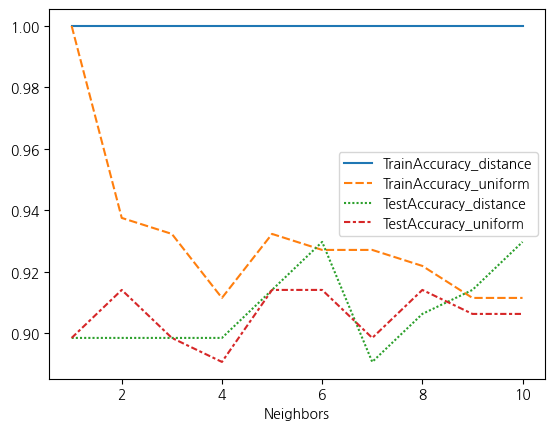

In [139]:
sns.lineplot(data = df_accuracy_weights_pivot)
plt.show(sns)

In [140]:
weights = 'uniform'

 * 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [141]:
train_accuracy = [];test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 2

para_metric = ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

    
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_n_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy

df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.898
1,2,euclidean,0.938,0.914
2,3,euclidean,0.932,0.898
3,4,euclidean,0.911,0.891
4,5,euclidean,0.932,0.914
5,6,euclidean,0.927,0.914
6,7,euclidean,0.927,0.898
7,8,euclidean,0.922,0.914
8,9,euclidean,0.911,0.906
9,10,euclidean,0.911,0.906


거리 계산 방법 별 정확도 차이는 크게 없어보이나, 이웃 수가 5일 때 manhattan에서 Test accuracy가 0.938로  
제일 높게 나와 Metric은 manhattan으로 선택.

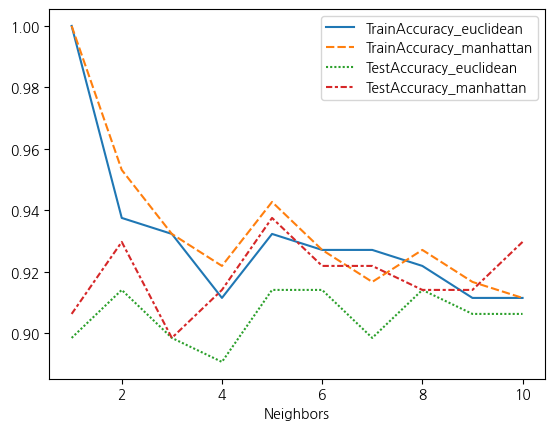

In [142]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric", 
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 +'_'+level1
sns.lineplot(data=df_accuracy_metric_pivot)
plt.show(sns)

In [143]:
knn_model = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform', metric = 'manhattan')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("test data accuracy: {0:.3f}".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

train data accuracy: 0.911
test data accuracy: 0.914
Confusion matrix : 
[[92  5]
 [ 6 25]]
              precision    recall  f1-score   support

           0      0.939     0.948     0.944        97
           1      0.833     0.806     0.820        31

    accuracy                          0.914       128
   macro avg      0.886     0.877     0.882       128
weighted avg      0.913     0.914     0.914       128



최종 모델 train accuracy : 91.1%, test accuracy : 91.4%  

train set의 정확도보다 test set의 정확도가 더 높다는 것은 모델이 train set에 과적합(overfitting)되지 않았고,  
새로운 데이터인 test set에 대해서도 좋은 성능을 보여준다는 것을 의미한다.  
이는 모델이 일반화(generalization) 능력이 있다는 것을 나타냄.